## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

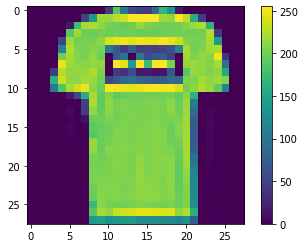

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Notes:
 ### Keras always takes value between 0 - 1

In [16]:
X_train = X_train/255.0

In [ ]:
X_test = X_test/255.0

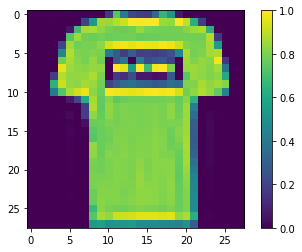

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Notes:
### Flatten layer just convert 28* 28 image size into 1D so that we can fit to the next layer

### Last denser should be equal to no of category 

In [20]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function - It will measure how accurate the model is durring training and testing. Loss function  minimize overall error during training and Once error is minimized during the training then testing error is also get minimized but it's not happened always because sometime model gets overfit.


- Optimizer
- Metrics

In [22]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4993 - accuracy: 0.8252
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3748 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3387 - accuracy: 0.8761
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3113 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2927 - accuracy: 0.8922
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2791 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2665 - accuracy: 0.9021
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2561 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2452 - accuracy: 0.9089
Epoch 10/10
60

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
print(test_acc)

0.8843


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = model.predict_classes(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8843

In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
pred = model.predict(X_test)

In [30]:
pred

array([[5.70382526e-11, 2.79669152e-11, 1.45444756e-12, ...,
        8.40873271e-03, 7.24584570e-09, 9.91518319e-01],
       [1.00345014e-05, 1.88898636e-12, 9.98303056e-01, ...,
        5.66917151e-20, 1.05219486e-10, 1.04194708e-11],
       [3.57689567e-09, 1.00000000e+00, 7.88107427e-12, ...,
        4.94073491e-17, 8.10784166e-13, 3.40640454e-17],
       ...,
       [6.17445767e-05, 1.04613283e-10, 3.05322501e-05, ...,
        5.66961056e-09, 9.98401463e-01, 1.55257187e-12],
       [1.71219924e-07, 9.99999523e-01, 8.89363427e-09, ...,
        1.41445146e-12, 1.25309878e-08, 1.46249357e-09],
       [1.15013324e-06, 2.48090668e-08, 1.82466272e-06, ...,
        1.53024821e-03, 3.57243625e-05, 1.49567973e-06]], dtype=float32)

In [31]:
pred[0]

array([5.7038253e-11, 2.7966915e-11, 1.4544476e-12, 1.1030212e-12,
       1.1115154e-12, 7.2965639e-05, 1.4492457e-10, 8.4087327e-03,
       7.2458457e-09, 9.9151832e-01], dtype=float32)

In [32]:
np.argmax(pred[0])

9

In [33]:
np.argmax(pred[1])

2